In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data=pd.read_csv('T-MC.txt', delim_whitespace=True)
data=pd.read_csv("T.dat", delim_whitespace=True)
#data=pd.read_csv('T-MC.txt', sep='\s+')

/tmp/ipykernel_9310/3008051203.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv("T.dat", delim_whitespace=True)


In [3]:
data

,Material,T_exp,T_MC,T_MC*,S,Error
0,Ba2NiWO6,48.0,23.0,46.0,1.0,4.20
1,BaMn2As2,625.0,460.0,644.0,2.5,3.04
2,BaMn2Bi2,387.2,238.0,333.2,2.5,13.90
3,BaNi2As2O8,18.5,11.0,22.0,1.0,18.90
4,Bi2CuO4,50.0,17.5,52.5,0.5,5.00
...,...,...,...,...,...,...
68,YbMnBi2,290.0,203.0,284.2,2.5,2.00
69,YbMnSb2,345.0,266.0,372.4,2.5,7.94
70,YFeO3,644.5,445.0,623.0,2.5,3.30
71,YMnO3,70.0,40.0,60.0,2.0,14.30


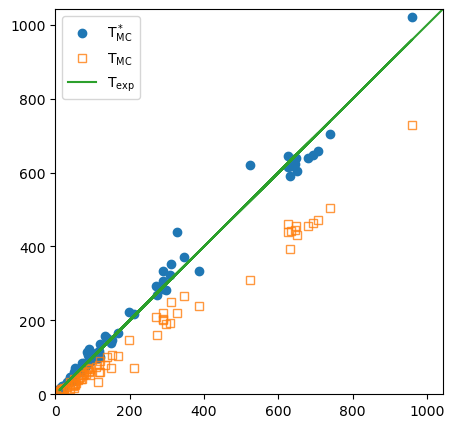

In [4]:
texp=data["T_exp"]
tmc=data["T_MC"]
tmc_cor=data["T_MC*"]
xideal=data["T_exp"]
fig, ax = plt.subplots(figsize =(5, 5))
plt.xticks([0,200,400,600,800,1000])
plt.plot(texp, tmc_cor,'o', label=r'T$_{\mathrm{MC}}^*$') 
plt.plot(texp, tmc, 's', alpha=0.8,markerfacecolor='none', label=r'T$_{\mathrm{MC}}$')
Tmax=max(texp.max(), tmc.max(), tmc_cor.max())
Texp=np.array(texp)
Texpnew=np.append(texp, Tmax+20)
plt.plot(Texpnew, Texpnew, label=r'T$_{\mathrm{exp}}$')
plt.xlim(0,Tmax+20)
plt.ylim(0,Tmax+20)
plt.legend()
plt.savefig("T.pdf")

In [5]:
ape_tmc=abs(tmc-texp)/texp*100
ape_tmc

0     52.083333
1     26.400000
2     38.533058
3     40.540541
4     65.000000
        ...    
68    30.000000
69    22.898551
70    30.954228
71    42.857143
72    50.000000
Length: 73, dtype: float64

In [6]:
#some checking
ape_tmc_cor=abs(tmc_cor-texp)/texp*100
j=0
for i in data["Error"]:
    if abs( data["Error"].values[j]-ape_tmc_cor[j] ) > 0.1:
        print(data["Material"][j], data["Error"].values[j]-ape_tmc_cor[j])
    j=j+1

In [7]:
#some checking
tmc_cor1=data["T_MC"]*(data["S"]+1.0)/data["S"]
j=0
for i in data["T_MC*"]:
    if abs(data["T_MC*"].values[j]-tmc_cor1[j]) > 0.1:
        print(data["Material"][j], data["T_MC*"].values[j], tmc_cor1[j])
    j=j+1

In [8]:
mask15=data["Error"]> 15
data[mask15]

,Material,T_exp,T_MC,T_MC*,S,Error
3,BaNi2As2O8,18.5,11.0,22.00,1.0,18.90
7,CaMn2Sb2,85.0,69.0,115.00,1.5,35.30
8,CaMn7O12,90.0,61.0,122.00,1.0,35.50
10,CoO,289.0,201.0,335.00,1.5,15.90
11,CoPS3,120.0,61.0,101.66,1.5,15.30
17,CrCl3,14.0,10.0,16.60,1.5,18.60
32,KCuF3,39.0,15.0,45.00,0.5,15.40
34,La2NiO4,328.0,220.0,440.00,1.0,34.10
38,LiFePO4,50.0,41.0,61.50,2.0,23.00
39,LuMnO3,87.5,71.0,106.50,2.0,21.70


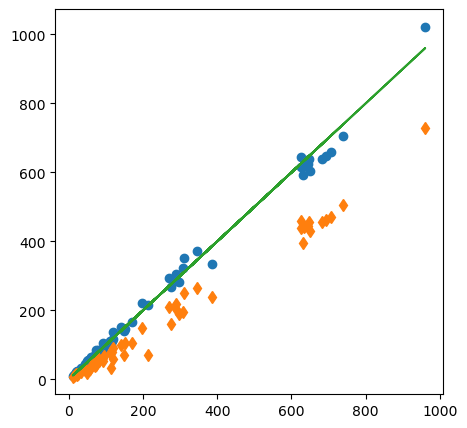

In [9]:
mask_l30=data["Error"]< 15
data[mask_l30]
texp=data[mask_l30]["T_exp"]
tmc=data[mask_l30]["T_MC"]
tmc_cor=data[mask_l30]["T_MC*"]
xideal=data[mask_l30]["T_exp"]
fig, ax = plt.subplots(figsize =(5, 5))
plt.plot(texp, tmc_cor,'o') 
plt.plot(texp, tmc, 'd')
plt.plot(texp, texp)

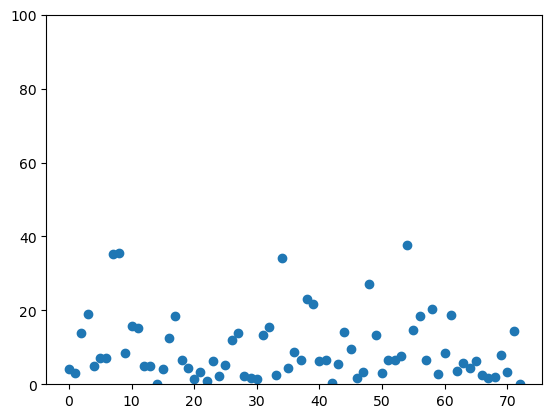

In [10]:
plt.ylim(0,100)
plt.plot(data["Error"],'o')

(array([21., 22.,  6.,  9.,  6.,  3.,  1.,  1.,  0.,  4.]),
 array([ 0.  ,  3.77,  7.54, 11.31, 15.08, 18.85, 22.62, 26.39, 30.16,
        33.93, 37.7 ]),
 <BarContainer object of 10 artists>)

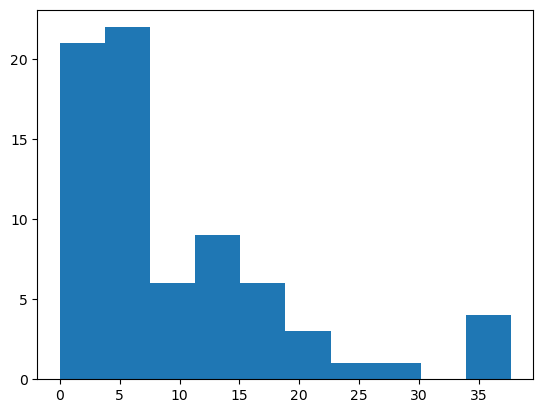

In [11]:
mask100=data["Error"] < 100
data[mask100]
plt.hist(data[mask100]["Error"], bins=10)

In [12]:
mask_l30=data["Error"]< 30
for i in data[mask_l30].index:
    print(data[mask_l30]["T_exp"][i])

48.0
625.0
387.2
18.5
50.0
650.0
56.0
270.0
289.0
120.0
308.0
93.0
45.0
32.0
20.0
14.0
61.0
11.0
213.0
69.15
16.57
960.0
23.55
78.4
198.0
120.0
110.0
170.0
647.0
114.0
39.0
275.0
738.0
139.5
150.0
50.0
87.5
630.0
24.0
67.0
117.0
92.0
78.0
74.0
152.0
48.0
310.0
65.0
13.5
693.0
52.0
73.2
523.0
707.0
38.4
94.0
82.6
133.0
54.0
290.0
297.0
681.0
635.0
627.0
290.0
345.0
644.5
70.0
118.0
